# Машинное обучение, ВМК МГУ

# Практическое задание 3

### Общая информация

Дата выдачи: 2 ноября 2020

Мягкий дедлайн: 01:00MSK 16 ноября 2020 (за каждый день просрочки снимается 1 балл, отсчет дней ведите от 01:00 2 ноября)

Жесткий дедлайн: 01:00MSK 23 ноября 2020.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-3-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-3-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** 12.0 = (10.0 базовых) + (1.0 + 0.5 + 0.5 бонусов)

**Напоминание:**
    
* Все ваши графики должны быть **"красивыми"** --- подробнее о том, как их оформлять, можно найти в первом практическом задании. При несоответствии какиму-то из критериев вам могут снять баллы.
* Пишите в текстовых ячейках/print в коде ответы на **все вопросы из заданий/просьбы сделать выводы** --- при их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и поэтому будем снижать баллы

In [1]:
%matplotlib inline
import copy
import functools
import sys

import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import collections, patheffects, ticker, lines
from sklearn import calibration, compose, linear_model, model_selection, feature_selection, metrics, base, svm, pipeline, preprocessing
from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split


def adjust_plot(figsize=(1, 1), dpi=1, dpi_skew=1):                                                                                                             
    plt.rcParams['figure.dpi'] = 72 * dpi * dpi_skew                                                                                 
    plt.rcParams['figure.figsize'] = [v*a/dpi for v, a in zip([6.4, 4.8], figsize)]


sns.set_theme(palette='tab10')
black_outline = {
    'path_effects': [patheffects.Stroke(linewidth=3, foreground='k'), patheffects.Stroke(linewidth=2)]
}

## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов (веса, они же составляют вектор w) близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями? 

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

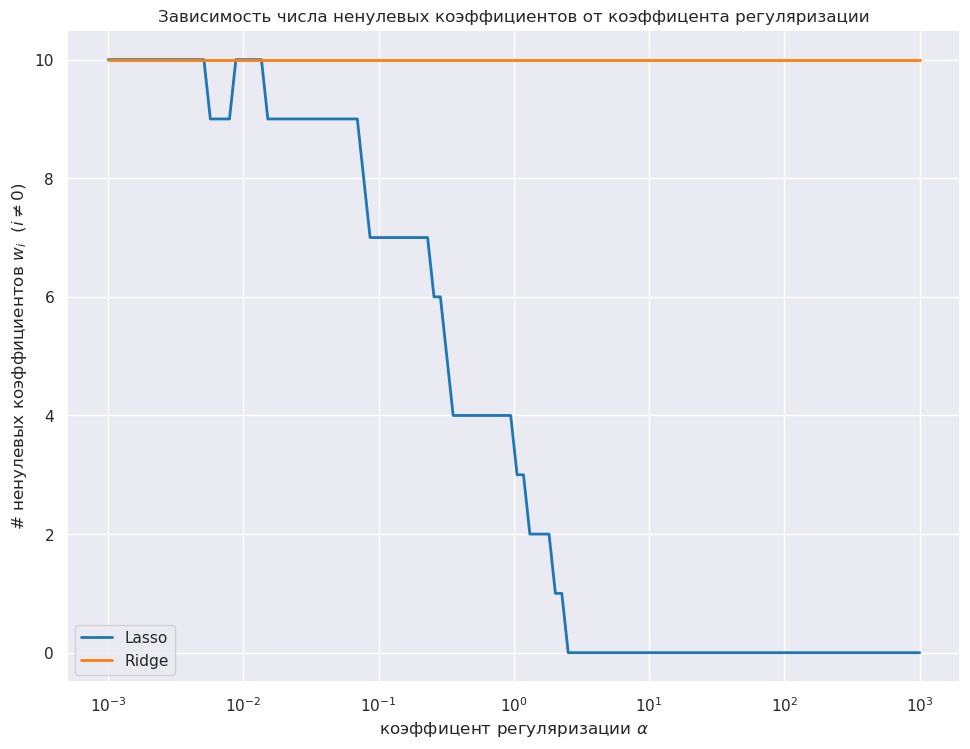

In [3]:
adjust_plot([2.5, 2.5], 1.4)
alpha_space = np.logspace(-3, 3, 128)
for model in [linear_model.Lasso, linear_model.Ridge]:
    zeros = np.empty_like(alpha_space)
    for idx in range(alpha_space.size):
        reg = model(alpha=alpha_space[idx]).fit(X_train, y_train)
        assert not np.isclose(reg.intercept_, 0)
        zeros[idx] = (~np.isclose(reg.coef_, 0)).sum()
    plt.plot(alpha_space, zeros, label=model.__name__, linewidth=2)
plt.xscale('log')
plt.legend()
plt.title('Зависимость числа ненулевых коэффициентов от коэффицента регуляризации')
plt.ylabel(r'# ненулевых коэффициентов $w_i\ \ \left(i \neq 0\right)$')
plt.xlabel(r'коэффицент регуляризации $\alpha$')
plt.show()

> Результаты согласуются с моими ожиданиями. $L_2$ регрессия в отличие от $L_1$ обычно не приводит к занулению весов, т.к. при уменьшении модуля веса, сила $L_2$ регрессии уменьшается, а сила $L_1$ регрессии остается постоянной.
> 
> Я не учитывал в графике сдвиг ($w_0$), т.к. он не регуляризуется и всегда $\neq 0$ для данного набора данных.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [4]:
metrics.root_mean_squared_error = functools.partial(metrics.mean_squared_error, squared=False)
metrics.root_mean_squared_error.__name__ = 'root_mean_squared_error'

In [5]:
reg = linear_model.Ridge(random_state=42).fit(X_train, y_train)
y_test_pred = reg.predict(X_test)
rmse, mae, r2 = (
    metrics.root_mean_squared_error(y_test, y_test_pred),
    metrics.mean_absolute_error(y_test, y_test_pred),
    metrics.r2_score(y_test, y_test_pred),
)
print(f" R^2: {r2:>10.6f}")
print(f"RMSE: {rmse:>10.6f}")
print(f" MAE: {mae:>10.6f}")

 R^2:   0.359899
RMSE:  58.304415
 MAE:  49.602846


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [6]:
def ridge_loss(estimator, X, y_true):
    y_pred = estimator.predict(X)
    delta = (y_true - y_pred)
    
    while not hasattr(estimator, 'alpha') or not hasattr(estimator, 'coef_'):
        estimator = estimator.estimator
    
    return ridge_loss._sign * ((delta * delta).sum() + estimator.alpha * (estimator.coef_ * estimator.coef_).sum())
ridge_loss._sign = -1


grid_metrics = {
    name: metrics.make_scorer(fun, greater_is_better=not neg)
    for neg, name, fun in [
        (True, 'RMSE', metrics.root_mean_squared_error),
        (True, 'MAE', metrics.mean_absolute_error),
        (False, 'R^2', metrics.r2_score),
    ]
}
grid_metrics['Loss'] = ridge_loss

In [7]:
reg = model_selection.GridSearchCV(
    linear_model.Ridge(random_state=42),
    param_grid={'alpha': alpha_space},
    cv=model_selection.KFold(shuffle=True, random_state=42),
    scoring=grid_metrics,
    refit='Loss'
)
reg = reg.fit(X_train, y_train)

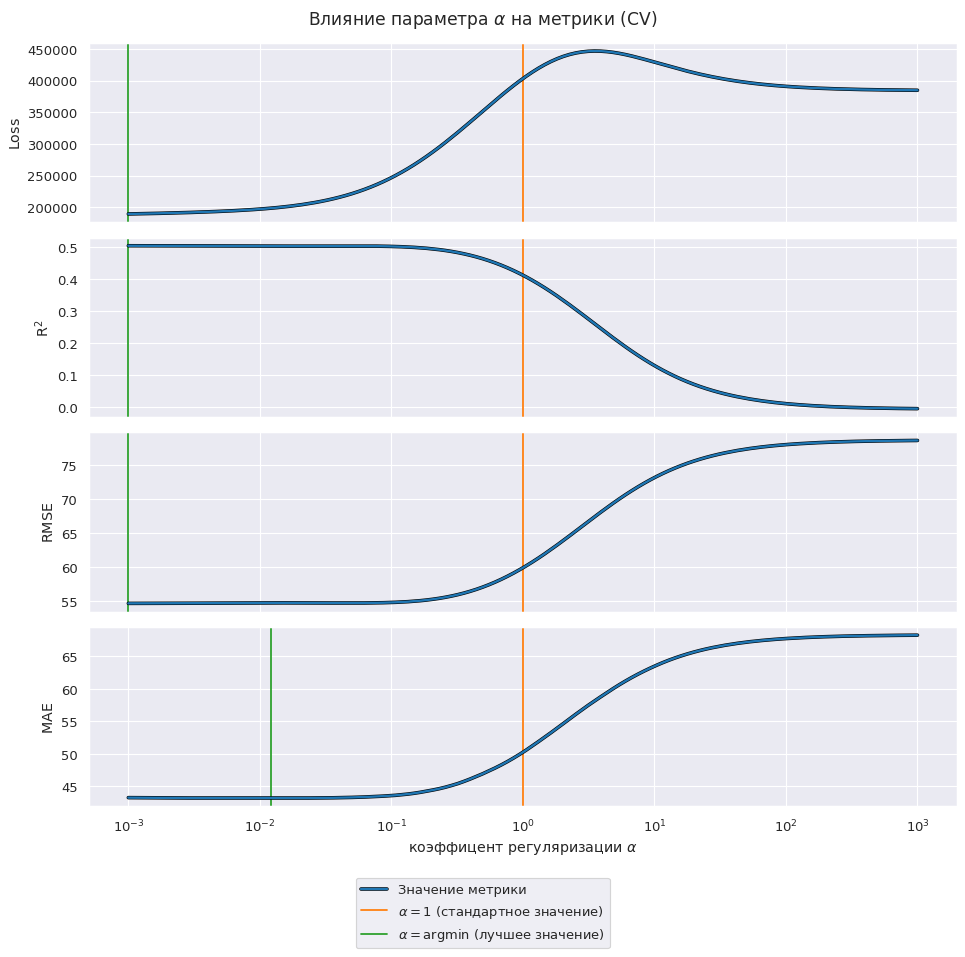

In [8]:
adjust_plot([2.5, 3], 1.4, 0.85)
fig, axs = plt.subplots(nrows=len(grid_metrics))
morder = ['Loss', 'R^2', 'RMSE', 'MAE']
for idx, (name, ax) in enumerate(zip(morder, axs)):
    metric = grid_metrics[name]
    vals = metric._sign * reg.cv_results_[f'mean_test_{name}']
    best_idx = reg.cv_results_[f'mean_test_{name}'].argmax()
    
    default = ax.axvline(1, color='C1')
    best = ax.axvline(alpha_space[best_idx], color='C2')
    line, = ax.plot(alpha_space, vals, color='C0', **black_outline)
    
    ax.set_xscale('log')
    ax.set_ylabel(f"$\mathrm{{{name}}}$")
    if 1 + idx == len(grid_metrics):
        ax.set_xlabel(r'коэффицент регуляризации $\alpha$')
    else:
        ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

fig.legend(
    [line, default, best],
    [
        'Значение метрики',
        r'$\alpha = 1$ (стандартное значение)',
        fr'$\alpha = \arg\min$ (лучшее значение)'
    ],
    bbox_to_anchor=(0.5, 0), loc='upper center'
)
fig.suptitle(r"Влияние параметра $\alpha$ на метрики (CV)")
fig.tight_layout()
fig.show()

In [9]:
morder = ['R^2', 'RMSE', 'MAE']
print(f"         Было       Стало")
best_alpha_score = {}
best_alpha_value = {}
for name in morder:
    metric = grid_metrics[name]._score_func
    best_alpha = alpha_space[reg.cv_results_[f'mean_test_{name}'].argmax()]
    
    # Alpha = 1
    y_test_pred = linear_model.Ridge(random_state=42).fit(X_train, y_train).predict(X_test)
    orig_val = metric(y_test, y_test_pred)
    # Alpha = armin
    y_test_pred = linear_model.Ridge(alpha=best_alpha, random_state=42).fit(X_train, y_train).predict(X_test)
    best_val = metric(y_test, y_test_pred)
    print(f"{name:>4}: {orig_val:>9.6f} → {best_val:>9.6f} (alpha: 1 → {best_alpha:>8.6f})")
    
    best_alpha_value[name] = best_alpha

         Было       Стало
 R^2:  0.359899 →  0.412494 (alpha: 1 → 0.001000)
RMSE: 58.304415 → 55.857768 (alpha: 1 → 0.001000)
 MAE: 49.602846 → 47.014095 (alpha: 1 → 0.012207)


> Качество заметно улучшилось

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [10]:
def squared_error(y_true, y_pred):
    errors = y_true - y_pred
    return errors * errors

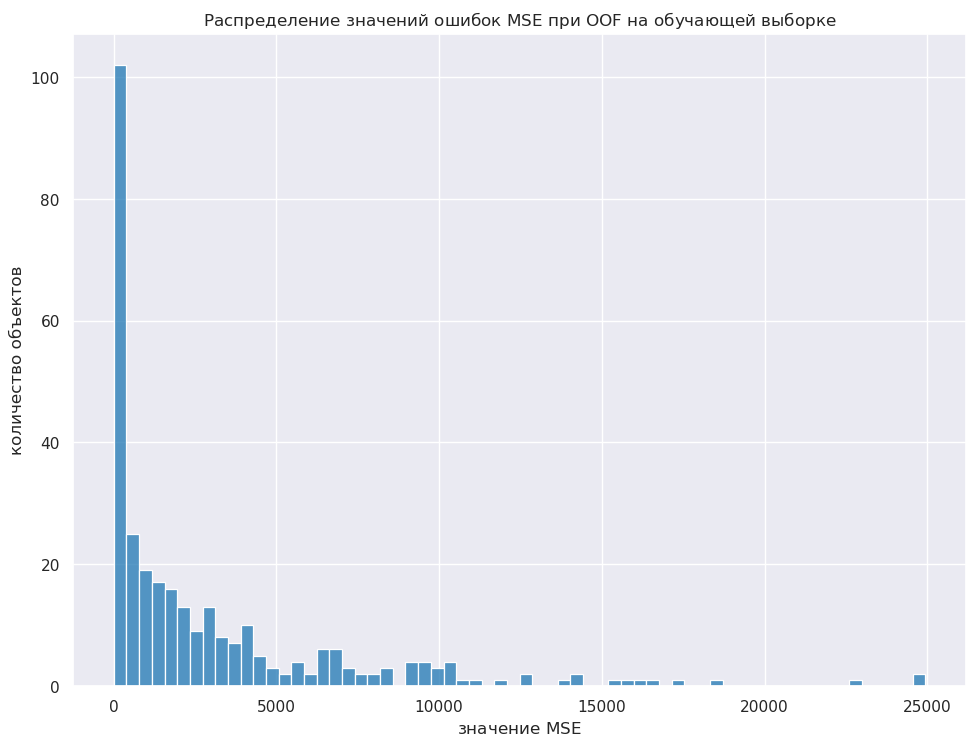

In [11]:
adjust_plot([2.5, 2.5], 1.35)
oof_train_pred = model_selection.cross_val_predict(
    linear_model.Ridge(alpha=best_alpha_value['RMSE'], random_state=42), X_train, y_train,
    cv=model_selection.KFold(shuffle=True, random_state=42)
)
oof_errors = squared_error(y_train, oof_train_pred)
sns.histplot(oof_errors, bins=64)
plt.title(r'Распределение значений ошибок $\mathrm{MSE}$ при OOF на обучающей выборке')
plt.ylabel(r'количество объектов')
plt.xlabel(r'значение $\mathrm{MSE}$')
plt.show()

> Видно, что есть объекты, для которых ошибка предсказания крайне велика. Возможно, это выбросы.

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [12]:
class FilteredRegressorOOF(base.BaseEstimator, base.RegressorMixin):
    def __init__(
        # Filter OOF
        self, estimator, metric, *,
        threshold=0.5, oof_cv=None,
    ):
        self.estimator = estimator
        self.metric = metric
        self.threshold = threshold
        self.oof_cv = model_selection.KFold() if oof_cv is None else oof_cv

    def fit(self, X, y):
        oof_pred = model_selection.cross_val_predict(
            base.clone(self.estimator), X, y,
            cv=self.oof_cv
        )
        oof_errors = self.metric(y, oof_pred)
        assert oof_errors.shape == oof_pred.shape, oof_errors.shape
        
        lo, hi = oof_errors.min(), oof_errors.max()
        threshold = self.threshold * lo + (1-self.threshold) * hi
        mask = oof_errors <= threshold
        X, y = X[mask], y[mask]
        
        self.estimator = base.clone(self.estimator).fit(X, y)
        return self

    def predict(self, X):
        return self.estimator.predict(X)

In [13]:
threshold_space = np.linspace(0, 0.99, 256)
reg = model_selection.GridSearchCV(
    FilteredRegressorOOF(
        linear_model.Ridge(best_alpha_value['RMSE'], random_state=42),
        squared_error,
        oof_cv=model_selection.KFold(shuffle=True, random_state=42)
    ),
    param_grid={'threshold': threshold_space},
    cv=model_selection.KFold(shuffle=True, random_state=42),
    scoring=grid_metrics,
    refit='RMSE'
)
reg = reg.fit(X_train, y_train)

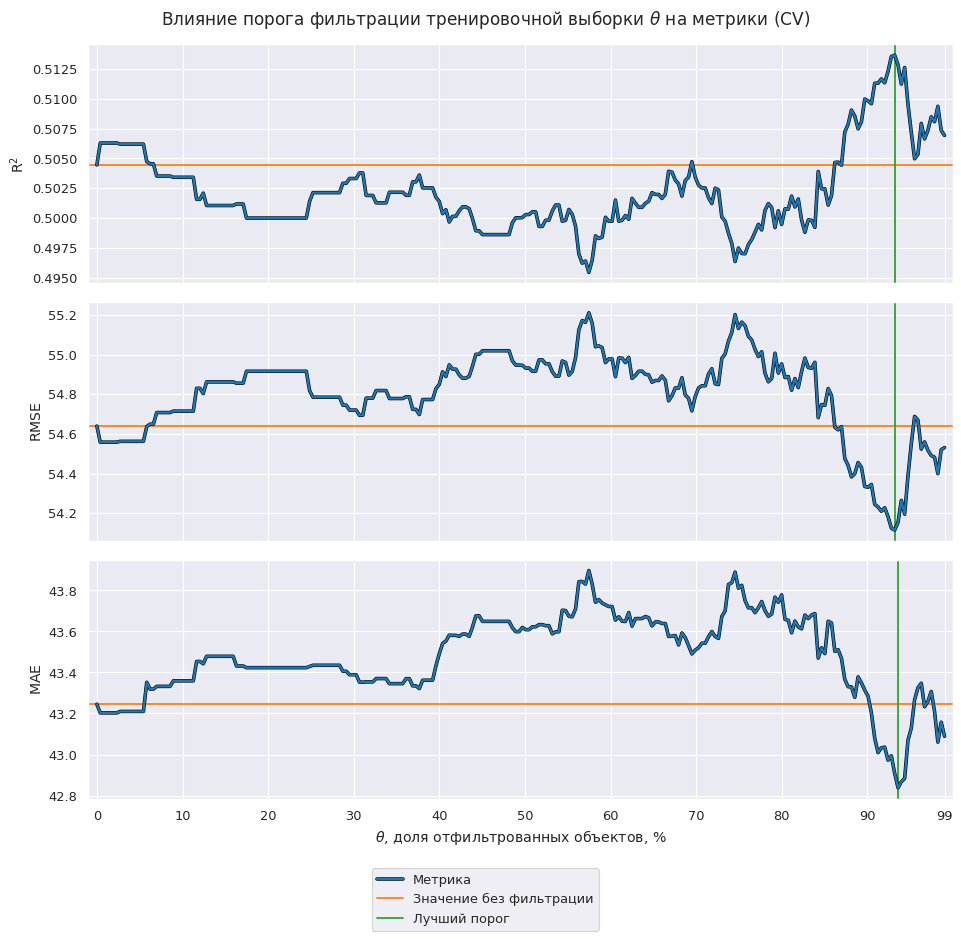

In [14]:
adjust_plot([2.5, 3], 1.4, 0.84)
morder = ['R^2', 'RMSE', 'MAE']
fig, axs = plt.subplots(nrows=len(morder))
for idx, (name, ax) in enumerate(zip(morder, axs)):
    metric = grid_metrics[name]
    vals = metric._sign * reg.cv_results_[f'mean_test_{name}']
    best_idx = reg.cv_results_[f'mean_test_{name}'].argmax()
    
    last = ax.axhline(vals[0], color='C1')
    best = ax.axvline(100 * threshold_space[best_idx], color='C2')
    line, = ax.plot(100 * threshold_space, vals, color='C0', **black_outline)
    
    ax.set_ylabel(f"$\mathrm{{{name}}}$")
    ax.set_xlim(100 * threshold_space[0] - 1, 100 * threshold_space[-1] + 1)
    ax.set_xticks(np.linspace(0, 100, 11).clip(0, 99))
    
    if 1 + idx == len(morder):
        ax.set_xlabel(r'$\theta$, доля отфильтрованных объектов, %')
    else:
        ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

fig.legend(
    [line, last, best],
    [
        'Метрика',
        'Значение без фильтрации',
        'Лучший порог',
    ],
    bbox_to_anchor=(0.5, 0), loc='upper center'
)
fig.suptitle(r"Влияние порога фильтрации тренировочной выборки $\theta$ на метрики (CV)")
fig.tight_layout()
fig.show()

In [15]:
morder = ['R^2', 'RMSE', 'MAE']
print(f"         Было       Стало")
for name in morder:
    metric = grid_metrics[name]._score_func
    best_threshold = threshold_space[reg.cv_results_[f'mean_test_{name}'].argmax()]
    best_alpha = best_alpha_value[name]
    # With OOF
    y_test_pred = FilteredRegressorOOF(
        linear_model.Ridge(best_alpha_value['RMSE'], random_state=42),
        squared_error,
        threshold=best_threshold,
        oof_cv=model_selection.KFold(shuffle=True, random_state=42),
    ).fit(X_train, y_train).predict(X_test)
    best_val = metric(y_test, y_test_pred)
    # Without OOF
    y_test_pred = linear_model.Ridge(best_alpha_value['RMSE'], random_state=42).fit(X_train, y_train).predict(X_test)
    orig_val = metric(y_test, y_test_pred)
    print(f"{name:>4}: {orig_val:>9.6f} → {best_val:>9.6f} (alpha: {best_alpha:>8.6f}, theta: {best_threshold:>7.3%})")

         Было       Стало
 R^2:  0.412494 →  0.422424 (alpha: 0.001000, theta: 93.176%)
RMSE: 55.857768 → 55.383694 (alpha: 0.001000, theta: 93.176%)
 MAE: 47.155551 → 46.613458 (alpha: 0.012207, theta: 93.565%)


> Результат улучшился. Это связано с тем, что Ridge регрессор – достаточно простая модель, ей достаточно даже небольшого количества данных. При этом, выбросы в обучающей выборке могут портить качество модели.

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [16]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [17]:
cls = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    svm.LinearSVC(max_iter=10000),
)
cls = cls.fit(X_train, y_train)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [18]:
def plot_curve(fig, axis, X, Y, auc, ax_labels, color='C0', margin=0.01):
    axis.set_xlim(0-margin, 1+margin)
    axis.set_ylim(0-margin, 1+margin)
    xlabel, ylabel = ax_labels
    axis.set_xlabel("{}, %".format(xlabel))
    axis.set_ylabel("{}, %".format(ylabel))

    axis.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, symbol=''))
    axis.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, symbol=''))

    axis.set_xticks(np.linspace(0, 1, 51), minor=True)
    axis.set_yticks(np.linspace(0, 1, 51), minor=True)

    axis.set_xticks(np.linspace(0, 1, 11), minor=False)
    axis.set_yticks(np.linspace(0, 1, 11), minor=False)

    axis.tick_params(which='both', bottom=True, left=True)

    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)

    axis.grid(clip_on=False)
    axis.set_axisbelow(True)

    axis.plot(X, Y, clip_on=False, color=color)
    axis.fill_between(X, Y, 0, alpha=.25, clip_on=False, color=color)
    axis.text(0.5, 0.5, f"{auc:.3%}", fontsize=20, color='black', ha='center', va='center', alpha=0.75)

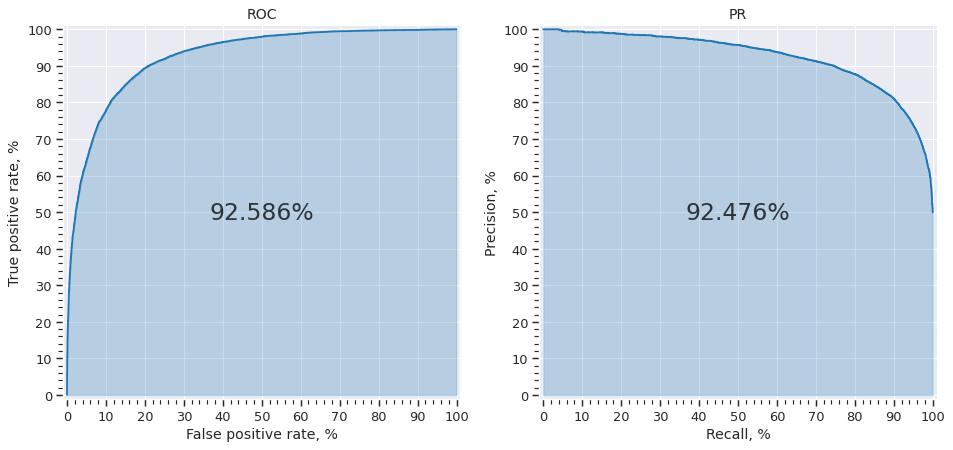

In [19]:
y_test_pred = cls.decision_function(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred)
pre, rec, _ = metrics.precision_recall_curve(y_test, y_test_pred)

adjust_plot([2.5, 1.6], 1.4, 0.84)
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_curve(fig, ax1, fpr, tpr, metrics.auc(fpr, tpr), ['False positive rate', 'True positive rate'])
ax1.set_title('ROC')
plot_curve(fig, ax2, rec, pre, metrics.auc(rec, pre), ['Recall', 'Precision'])
ax2.set_title('PR')
fig.tight_layout()
fig.show()

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [20]:
X, y = make_classification(
    n_samples=1000, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)

In [21]:
def multiclass_scatterplot(pts, clss, **kwargs):
    clss = clss.astype(np.bool)
    x, y = pts.T
    
    artists = sns.scatterplot(x=x, y=y, hue=clss, palette=['C0', 'C1'], legend=False, **kwargs).get_children()
    artists = [a for a in artists if isinstance(a, collections.PathCollection)]
    
    artists = [copy.copy(artists[-1]), copy.copy(artists[-1])]
    artists[0].set_color('C0')
    artists[1].set_color('C1')
    
    for a in artists:
        for k, v in kwargs.items():
            if k in {'marker'}:
                continue
            elif k in {'size', 's'}:
                a.set_sizes([v])
            else:
                setter = getattr(a, f'set_{k}', None)
                if setter is None:
                    raise NotImplementedError(k)
                setter(v)

    return artists

def support_line(x, coef, intercept):
    cx, cy = coef
    return -(cx * x + intercept)/cy

In [22]:
cls = svm.SVC(kernel='linear')
cls = cls.fit(X, y)

In [23]:
sv_mask = np.zeros_like(y, dtype=np.bool)
sv_mask[cls.support_] = True

cX = cls.coef_.squeeze()
c0 = cls.intercept_.item()

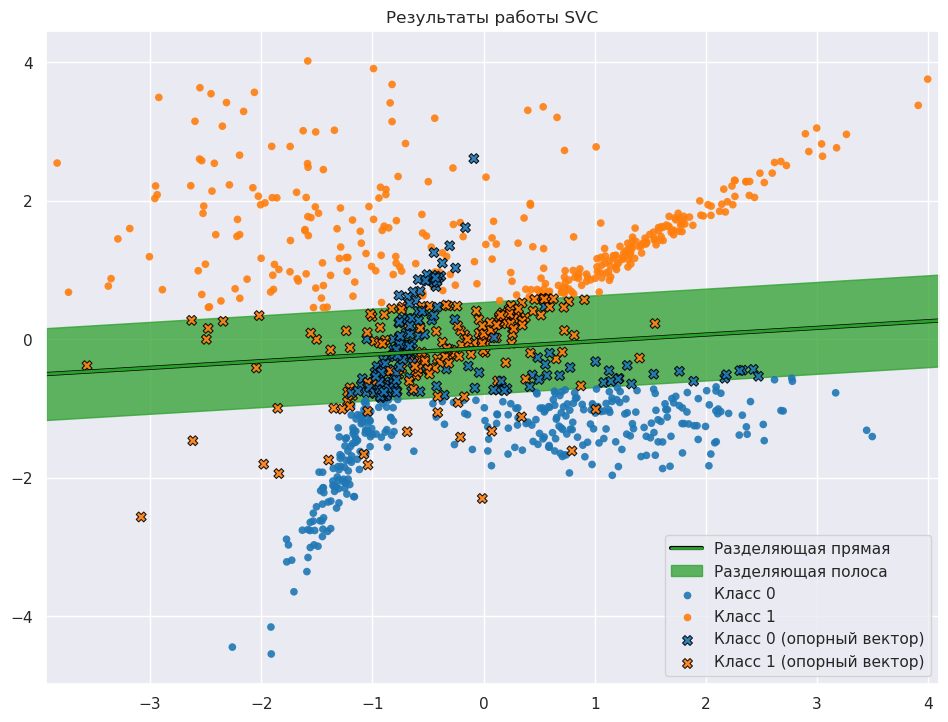

In [24]:
adjust_plot([2.5, 2.5], 1.4, 1)

artists = []

margin = 0.1
x_sup = np.array([X[:,0].min() - margin, X[:,0].max() + margin])
artists.extend(plt.plot(x_sup, support_line(x_sup, cX, c0), color='C2', **black_outline))
artists.append(plt.fill_between(x_sup, support_line(x_sup, cX, c0 + 1), support_line(x_sup, cX, c0 - 1), alpha=0.75, color='C2', zorder=1))
plt.gca().set_xlim(*x_sup)

artists.extend(multiclass_scatterplot(X[~sv_mask], y[~sv_mask], marker='o', s=30, linewidth=0, alpha=0.9))
artists.extend(multiclass_scatterplot(X[sv_mask], y[sv_mask], marker='X', s=50, edgecolor='k', linewidth=0.75, alpha=0.9))

plt.title('Результаты работы SVC')
plt.legend(artists, ['Разделяющая прямая', 'Разделяющая полоса', 'Класс 0', 'Класс 1', 'Класс 0 (опорный вектор)', 'Класс 1 (опорный вектор)'])
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [25]:
def get_calibration_curve(y_test, preds, n_bins=20):
    bin_middle_points = np.empty(n_bins)
    bin_real_ratios = np.empty(n_bins)
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points[i] = (l + r) / 2
        bin_real_ratios[i] = np.mean(y_test[(preds >= l) & (preds < r)] == 1)
    return bin_middle_points, bin_real_ratios

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [26]:
reg = linear_model.LogisticRegression(random_state=42)
cls = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    svm.LinearSVC(max_iter=10000),
)

def proba_to_signle_class(mod, x):
    p0, p1 = mod.predict_proba(x).T
    assert np.isclose(p0+p1, 1).all()
    return p1

def get_reg_proba(x):
    return proba_to_signle_class(reg, x)

def get_svc_proba(x):
    dc = cls.decision_function(x)
    dc -= dc.min()
    dc /= dc.max()
    return dc

mods = [("Логистическая регрессия", reg, get_reg_proba), ("Линейный SVC", cls, get_svc_proba)]
for _, mod, _ in mods:
    mod.fit(X_train, y_train)

In [27]:
def plot_calibration_curves(mods):
    adjust_plot([2.5, 3.2], 1.4, 0.95)
    margin=0.01
    plt.xlim(0 - margin, 1 + margin)
    plt.ylim(0 - margin, 1 + margin)
    plt.xticks(np.linspace(0, 1, 11))
    plt.yticks(np.linspace(0, 1, 11))
    plt.plot([0, 1], [0, 1], color='k', linestyle=':', label='Идеальная калибровка')
    for name, _, fun in mods:
        plt.plot(*get_calibration_curve(y_test, fun(X_test)), label=name, **black_outline)
    plt.title('Сравнение калибровочных кривых')
    plt.xlabel('Предсказание модели')
    plt.ylabel('Доля положительных объектов')
    plt.legend()
    plt.show()

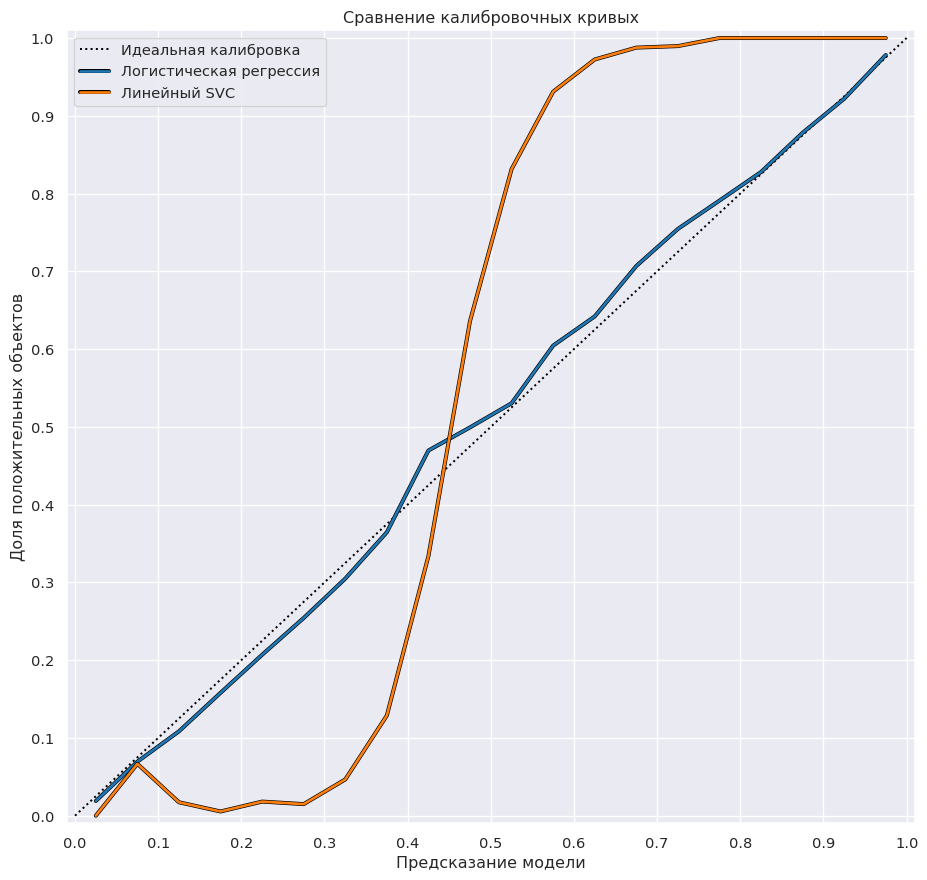

In [28]:
plot_calibration_curves(mods)

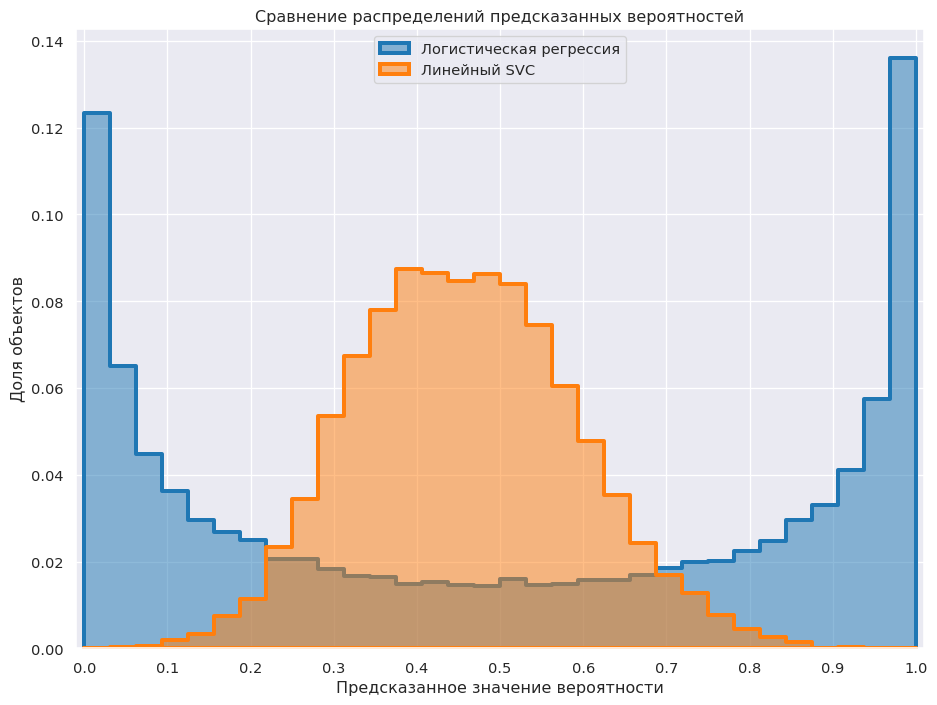

In [29]:
adjust_plot([2.5, 2.5], 1.4, 0.95)
margin=0.01
plt.xlim(0 - margin, 1 + margin)
plt.xticks(np.linspace(0, 1, 11))
for cidx, (name, _, fun) in enumerate(mods):
    sns.histplot(fun(X_test), stat='probability', bins=32, linewidth=3, alpha=0.5, color=f"C{cidx}", element="step", label=name)
plt.title('Сравнение распределений предсказанных вероятностей')
plt.xlabel('Предсказанное значение вероятности')
plt.ylabel('Доля объектов')
plt.legend(loc='upper center')
plt.show()

> Логистическая регрессия по своей сути сформулирована так, что при обучении происходит максимизация правдоподобия предсказываемых вероятностей и как следствие, полученные предсказания хорошо соответствуют идеальной калибровочной кривой.
> 
> С другой стороны, decision функция SVM описывает метрические характеристики точек относительно разделяющей прямой. В силу линейности модели и примерно нормального распределения входных данных, "вероятности" SVC получаются распределены примерно нормально, что вообще может не соответствовать хорошей калибровке. 

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [30]:
cal_cls = calibration.CalibratedClassifierCV(base.clone(cls), cv=model_selection.StratifiedKFold(shuffle=True, random_state=42))
cal_cls = cal_cls.fit(X_train, y_train)

def get_cal_proba(x):
    p0, p1 = cal_cls.predict_proba(x).T
    assert np.isclose(p0+p1, 1).all()
    return p1

platt_mod = [('Калброванный SVC (Платт)', cal_cls, get_cal_proba)]

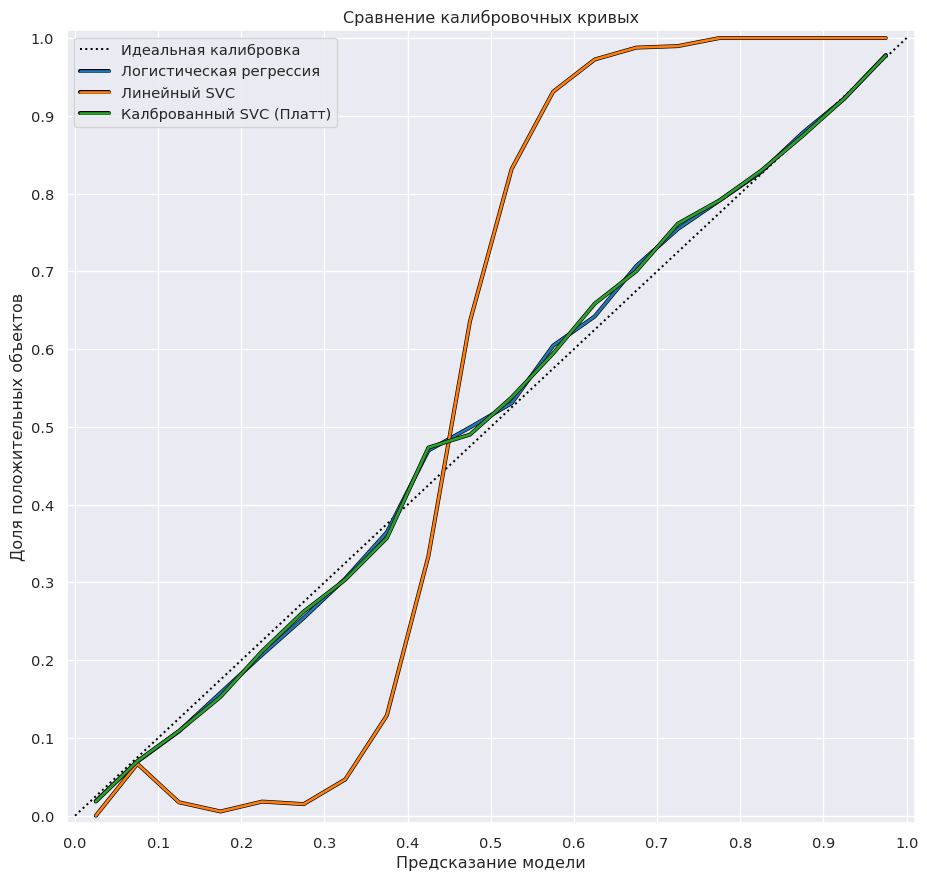

In [31]:
plot_calibration_curves(mods + platt_mod)

> Видно, что данный метод калибровки вполне хорошо калибрует выходы SVC.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [32]:
class InterpCaliratedClassifier(base.BaseEstimator, base.ClassifierMixin):
    def __init__(self, estimator):
        self.estimator = base.clone(estimator)

    def fit(self, X, y):
        self.estimator.fit(X, y)
        p = self.estimator.decision_function(X)

        lo, hi = p.min(), p.max()
        dv = hi - lo
        self._lo, self._dv = lo, dv
        
        self._px, self._py = get_calibration_curve(y, (p - lo)/dv)
        return self

    def predict_proba(self, X):
        p = self.estimator.decision_function(X)
        lo, dv, px, py = self._lo, self._dv, self._px, self._py
        return np.interp((p - lo)/dv, px, py, left=0, right=1)

In [33]:
int_cal_cls = InterpCaliratedClassifier(cls)
int_cal_cls.fit(X_train, y_train)
inter_mod = [('Калброванный SVC (Интерполяция)', int_cal_cls, int_cal_cls.predict_proba)]

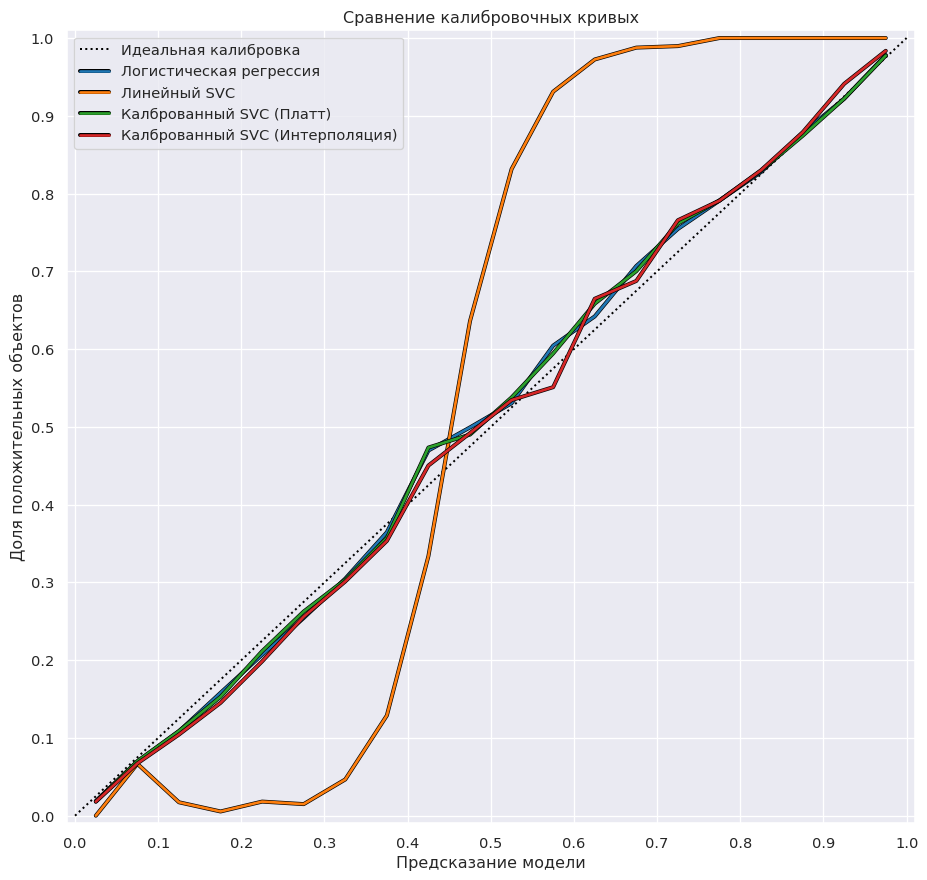

In [34]:
plot_calibration_curves(mods + platt_mod + inter_mod)

> Идея реализованной мной калибровки – достаточно простая. Для "хорошо" откалиброванной модели $f(x)$ должно выполняться, что среднее значение $f(x)$ по бину вероятности $p$ из калибровочной кривой должно быть примерно равно $p$. Тогда будем откалибруем модель, отобразим выходы модели в центре каждого бина в соответствующий $p$, линейно интерполируя значения между центрами бинов.
>
> Плюс данного подхода, в том что он не делает никаких предположений о распределении выходов модели (как метод Платта)
>
> Минус в том, что калибровка может переобучаться или совершать немонотонные преобразования над выходом модели

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [35]:
data = pd.read_csv('./hw-practice-3.data/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [36]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [37]:
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train, y_train)
y_test_pred = proba_to_signle_class(reg, X_test)

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

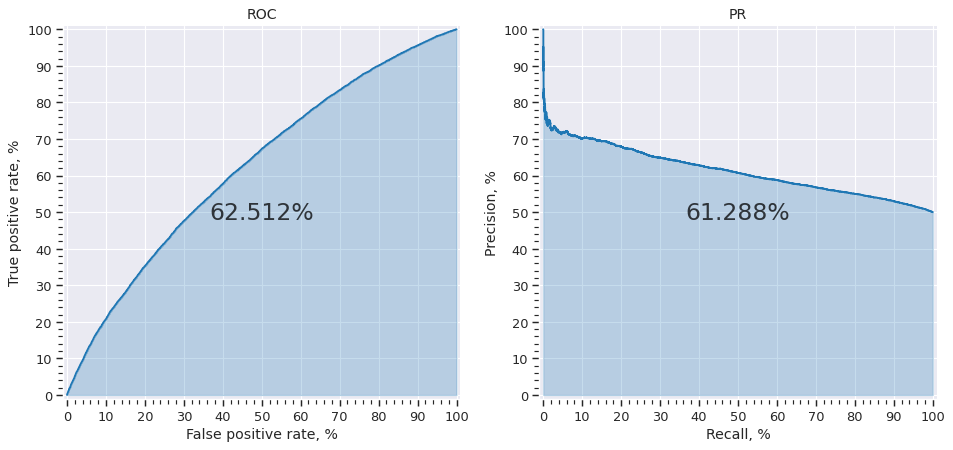

In [38]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred)
pre, rec, _ = metrics.precision_recall_curve(y_test, y_test_pred)

adjust_plot([2.5, 1.6], 1.4, 0.84)
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_curve(fig, ax1, fpr, tpr, metrics.auc(fpr, tpr), ['False positive rate', 'True positive rate'])
ax1.set_title('ROC')
plot_curve(fig, ax2, rec, pre, metrics.auc(rec, pre), ['Recall', 'Precision'])
ax2.set_title('PR')
fig.tight_layout()
fig.show()

> По данным графикам можно сделать вывод, что логистическая модель не очень хорошо работает на данных данных <img src="https://i.ibb.co/jrFpBJq/mash-mash.jpg" style="height: 1.5em;display: inline;">. <br/>
> Скорее всего она слишком простая для данного набора данных.

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [39]:
def get_fit_curves(estimator, num_epochs=512):
    estimator = base.clone(estimator)
    train_loss = np.empty(num_epochs)
    test_loss = np.empty(num_epochs)

    for idx in range(num_epochs):
        estimator.partial_fit(X_train, y_train, classes=[0, 1])

        y_train_pred = proba_to_signle_class(estimator, X_train)
        y_test_pred = proba_to_signle_class(estimator, X_test)

        train_loss[idx] = metrics.log_loss(y_train, y_train_pred)
        test_loss[idx] = metrics.log_loss(y_test, y_test_pred)

    return train_loss, test_loss

In [40]:
alpha_space = np.logspace(-4, 0, 5)
losses = np.empty((alpha_space.size, 2, 512))

for idx, alpha in enumerate(tqdm.std.tqdm(alpha_space, ncols=121, file=sys.stdout)):
    losses[idx] = get_fit_curves(linear_model.SGDClassifier(alpha=alpha, random_state=42, loss='log'))

100%|██████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:25<00:00, 53.17s/it]


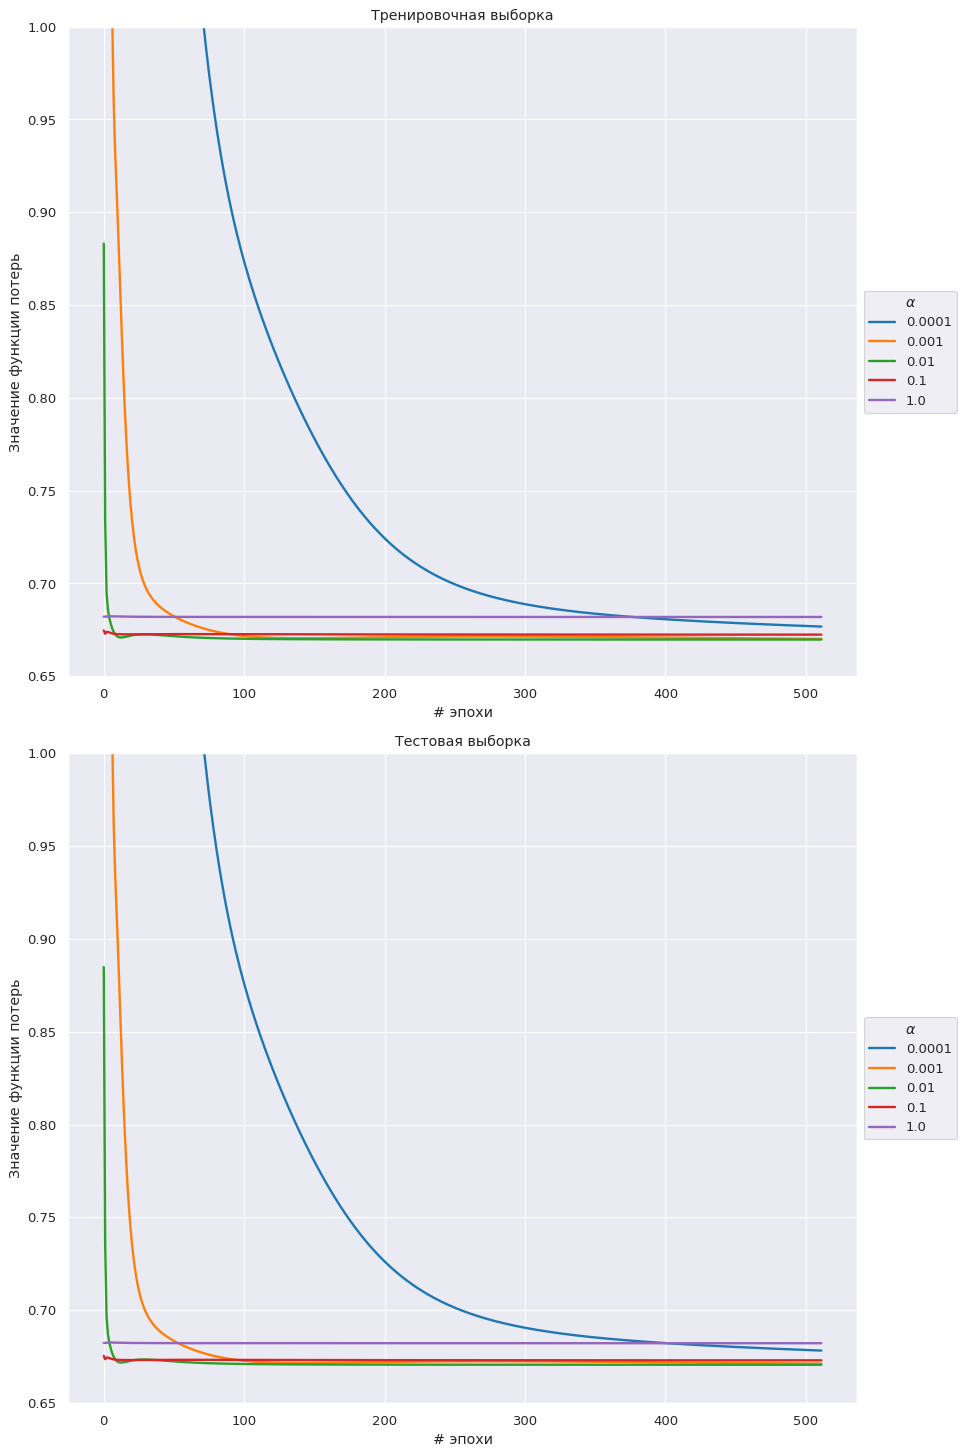

In [41]:
adjust_plot([2.5, 5], 1.4, 0.85)

fig, axes = plt.subplots(nrows=2)
for aidx, alpha in enumerate(alpha_space):
    for tidx, (ax, tname) in enumerate(zip(axes, ['Тренировочная выборка', 'Тестовая выборка'])):
        ax.plot(losses[aidx, tidx], color=f'C{aidx}', label=str(alpha), linewidth=2)
        ax.legend(title=r'$\alpha$', bbox_to_anchor=(1, 0.5), loc='center left')
        ax.set_title(tname)
        ax.set_ylim(losses.min() - 0.02, 1)
        ax.set_xlabel('# эпохи')
        ax.set_ylabel(r'Значение функции потерь')
plt.tight_layout()
plt.show()

> Стоит обратить внимание, что т.к. в этом задании для train и test было сделано пересэмплирование с `replace=True`, то ~32% теста содержится в трейне и вполне вероятно, что мы переобучаемся на тестовой выборке.

In [42]:
train_idx = set(X_train.index)
test_idx = set(X_test.index)
print(f"{len(train_idx & test_idx)/len(test_idx):.3%}")

32.046%


## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [43]:
%%time
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train, y_train)

CPU times: user 13.4 s, sys: 0 ns, total: 13.4 s
Wall time: 13.4 s


In [44]:
y_test_pred = proba_to_signle_class(reg, X_test)
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%}")

ROCAUC: 62.512%


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [45]:
cat_columns = X_train.columns[X_train.columns.str.endswith('cat')]
cat_prep = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(), cat_columns),
    remainder='passthrough',
)
X_train_oh = cat_prep.fit_transform(X_train)
X_test_oh = cat_prep.transform(X_test)

In [46]:
%%time
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train_oh, y_train)

CPU times: user 14.1 s, sys: 48 µs, total: 14.1 s
Wall time: 14.1 s


In [47]:
y_test_pred = proba_to_signle_class(reg, X_test_oh)
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (Baseline)")

ROCAUC: 63.293% (Baseline)


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [48]:
class CounterNoise(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, noise_level, C=0.0, random_state=None):
        self.noise_level = noise_level
        self.random_state = random_state
        self.C = C

    def _fit_single(self, x, y, uniq):
        vals = np.empty(uniq.size)
        for idx, u in enumerate(uniq):
            mask = x == u
            count = y[mask].sum() + self.C * self._global_mean
            norm = mask.sum() + self._global_mean
            vals[idx] = count/norm
        return vals
        
    def fit(self, X, y):
        self._gen = np.random.default_rng(self.random_state)
        self._global_mean = y.mean()
        self._cats = {c: np.sort(v.unique()) for c, v in X.items()}
        self._cats = {c: (self._cats[c], self._fit_single(v, y, self._cats[c])) for c, v in X.items()}
        return self

    def transform(self, X):
        X_vals = np.empty(X.shape)
        for cidx, (c, (uniq, vals)) in enumerate(self._cats.items()):
            X_c = X[c]
            X_uniq = X_c.unique()
            assert np.all(np.isin(X_uniq, uniq)), (c, X_uniq, uniq)
            for u, v in zip(uniq, vals):
                X_vals[X_c == u, cidx] = v
        X_vals += self.noise_level * self._gen.normal(size=X_vals.shape)
        return X_vals

In [49]:
cat_prep = compose.make_column_transformer(
    (CounterNoise(noise_level=0.0001, random_state=42), cat_columns),
    remainder='passthrough'
)
X_train_count = cat_prep.fit_transform(X_train, y_train)
X_test_count = cat_prep.transform(X_test)

In [50]:
%%time
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train_count, y_train)

CPU times: user 29.1 s, sys: 0 ns, total: 29.1 s
Wall time: 29.1 s


In [51]:
y_test_pred = proba_to_signle_class(reg, X_test_count)
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (CounterNoise)")

ROCAUC: 62.879% (CounterNoise)


> Предложенный механизм
> - работает хуже чем one-hot encoding
> - сложнее чем one-hot encoding
> - может приводить к утечке значений target/переобучению
> 
> Вывод: его не стоит использовать

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [52]:
class CounterAbove(CounterNoise):
    def __init__(self, noise_level, C=0.0, random_state=None):
        super().__init__(noise_level=noise_level, C=C, random_state=random_state)

    def fit_transform(self, X, y):
        self.fit(X, y)
        X_vals = np.empty(X.shape)
        for cidx, (c, (uniq, _)) in enumerate(self._cats.items()):
            X_c = X[c]
            for u in uniq:
                mask = X_c == u
                y_c = y[mask]
                vals = np.cumsum(y_c)[:-1] / np.arange(1, y_c.size)
                vals = np.concatenate([[self._global_mean], vals])
                X_vals[mask, cidx] = vals
        X_vals += self.noise_level * self._gen.normal(size=X_vals.shape)
        return X_vals

In [53]:
cat_prep = compose.make_column_transformer(
    (CounterAbove(noise_level=0.0001, random_state=42), cat_columns),
    remainder='passthrough'
)
X_train_count = cat_prep.fit_transform(X_train, y_train)
X_test_count = cat_prep.transform(X_test)

In [54]:
%%time
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train_count, y_train)

CPU times: user 14.5 s, sys: 0 ns, total: 14.5 s
Wall time: 14.6 s


In [55]:
y_test_pred = proba_to_signle_class(reg, X_test_count)
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (CounterAbove)")

ROCAUC: 62.849% (CounterAbove)


А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

> Если некоторая категория встречается в выборке всего несколько раз, то значение счетчика будет "сливать" данные о целевой переменной и при этом нет гарантий, что значения целевой переменной на тестовой выборке будет таким же, а значит точность модели может пострадать.

In [56]:
cat_prep = compose.make_column_transformer(
    (CounterNoise(noise_level=0.0001, C=1.0, random_state=42), cat_columns),
    remainder='passthrough'
)
X_train_count = cat_prep.fit_transform(X_train, y_train)
X_test_count = cat_prep.transform(X_test)

In [57]:
%%time
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train_count, y_train)

CPU times: user 28.1 s, sys: 0 ns, total: 28.1 s
Wall time: 28.2 s


In [58]:
y_test_pred = proba_to_signle_class(reg, X_test_count)
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (CounterNoise + Smoothing)")

ROCAUC: 62.882% (CounterNoise + Smoothing)


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

> Предложенный механизм
> - работает хуже чем one-hot encoding
> - сложнее чем one-hot encoding
> - может приводить к утечке значений target/переобучению
> - предложенные вариации с добавлением шума, сглаживанием и вычислением признаков по "объектам расположенным выше в датасете" не изменяют ситуацию/изменяют не значительно
> 
> Вывод: его не стоит использовать

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [59]:
data = pd.read_csv('hw-practice-3.data/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [60]:
cat_columns = X_train.columns[X_train.columns.str.endswith('cat')]
cat_prep = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(), cat_columns),
    remainder='passthrough',
)
X_train_oh = cat_prep.fit_transform(X_train)
X_test_oh = cat_prep.transform(X_test)
print(f"Количество признаков: {X_train_oh.shape[-1]}")

Количество признаков: 227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [61]:
%%time
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train_oh, y_train)

CPU times: user 45.9 s, sys: 2.84 ms, total: 45.9 s
Wall time: 45.9 s


In [62]:
y_test_pred = proba_to_signle_class(reg, X_test_oh)
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (Baseline)")

ROCAUC: 63.806% (Baseline)


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [63]:
reg = linear_model.LinearRegression()
reg = reg.fit(X_train_oh, y_train)

In [64]:
features = np.argsort(np.abs(reg.coef_))[-200:]
X_train_oh_200 = X_train_oh[:, features]
X_test_oh_200 = X_test_oh[:, features]

In [65]:
%%time
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train_oh_200, y_train)

CPU times: user 17 s, sys: 0 ns, total: 17 s
Wall time: 17 s


In [66]:
y_test_pred = proba_to_signle_class(reg, X_test_oh_200)
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (Filter by LinearRegression)")

ROCAUC: 63.847% (Filter by LinearRegression)


> Качество слегка увеличилось.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [67]:
reg = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LinearRegression()
)
reg = reg.fit(X_train_oh.toarray(), y_train)

In [68]:
features = np.argsort(np.abs(reg.named_steps['linearregression'].coef_))[-200:]
X_train_oh_200 = X_train_oh[:, features]
X_test_oh_200 = X_test_oh[:, features]

In [69]:
%%time
reg = reg = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(max_iter=10000, random_state=42)
)
reg = reg.fit(X_train_oh.toarray(), y_train)

CPU times: user 13.6 s, sys: 506 ms, total: 14.1 s
Wall time: 14.1 s


In [70]:
y_test_pred = proba_to_signle_class(reg, X_test_oh.toarray())
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (Baseline + StandardScaler)")

ROCAUC: 63.808% (Baseline + StandardScaler)


In [71]:
%%time
reg = reg = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(max_iter=10000, random_state=42)
)
reg = reg.fit(X_train_oh_200.toarray(), y_train)

CPU times: user 13.5 s, sys: 450 ms, total: 14 s
Wall time: 14 s


In [72]:
y_test_pred = proba_to_signle_class(reg, X_test_oh_200.toarray())
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (Baseline + StandardScaler + Filter by LinearRegression)")

ROCAUC: 63.786% (Baseline + StandardScaler + Filter by LinearRegression)


> Фильтрация признаков после StandardScaler дает результаты хуже, чем без StandardScaler.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [73]:
def get_stats(x):
    std = np.std(x, axis=0)
    return np.mean(x, axis=0), std * std, x.shape[0]


class FilterTStat(base.BaseEstimator, feature_selection.SelectorMixin):
    def __init__(self, num_features):
        self.num_features = num_features

    def fit(self, X, y):
        y_ = y.astype(np.bool)
        assert np.all(np.isclose(y, y_)), "Expected y to be a binary target"
        y = y_
        up, sp, cp = get_stats(X[y])
        un, sn, cn = get_stats(X[~y])
        ts = np.abs(up - un)/np.sqrt((cp*sp + cn*sn)/(cp + cn))
        self._order = np.argsort(ts)
        return self
        
    def _get_support_mask(self):
        mask = np.empty(self._order.size, dtype=np.bool)
        features = self._order[-self.num_features:]
        mask[features] = True
        return mask

In [74]:
filt = FilterTStat(200)
X_train_oh_200 = filt.fit_transform(X_train_oh.toarray(), y_train)
X_test_oh_200 = filt.transform(X_test_oh.toarray())

In [75]:
%%time
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train_oh_200, y_train)

CPU times: user 2min 18s, sys: 43.2 ms, total: 2min 18s
Wall time: 2min 18s


In [76]:
y_test_pred = proba_to_signle_class(reg, X_test_oh_200)
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (Filter by t-statistic)")

ROCAUC: 63.858% (Filter by t-statistic)


### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [77]:
train, valid = next(model_selection.StratifiedKFold(n_splits=2, shuffle=True, random_state=42).split(X_train_oh, y_train))

Xf_valid_oh = X_train_oh[valid]
yf_valid = y_train[valid]
Xf_train_oh = X_train_oh[train]
yf_train = y_train[train]

In [78]:
# Normalizing features speeds up convergence significantly
norm = preprocessing.StandardScaler()

Xf_train_oh = norm.fit_transform(Xf_train_oh.toarray())
Xf_valid_oh = norm.transform(Xf_valid_oh.toarray())

X_train_oh = norm.transform(X_train_oh.toarray())
X_test_oh = norm.transform(X_test_oh.toarray())

In [80]:
feature_mask = np.ones(Xf_train_oh.shape[-1], dtype=np.bool)
n_features = 200
n_train_samples = 10000

while feature_mask.sum() > n_features:
    features = np.arange(feature_mask.size)[feature_mask]
    results = np.zeros(feature_mask.size)
    pb = tqdm.std.tqdm(features, ncols=121, file=sys.stdout)
    for idx, feature in enumerate(pb):
        next_mask = feature_mask.copy()
        next_mask[feature] = False

        reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
        reg = reg.fit(Xf_train_oh[:n_train_samples, next_mask], yf_train[:n_train_samples])
        yf_valid_pred = proba_to_signle_class(reg, Xf_valid_oh[:, next_mask])
        
        results[idx] = metrics.roc_auc_score(yf_valid, yf_valid_pred)

    drop = features[np.argmax(results)]
    pb.write(f"Dropped feature #{drop:>03} with ROCAUC {results.max():.3%}\n")
    pb.close()
    feature_mask[drop] = False

100%|██████████████████████████████████████████████████████████████████████████████████| 227/227 [03:15<00:00,  1.16it/s]
Dropped feature #223 with ROCAUC 54.631%

100%|██████████████████████████████████████████████████████████████████████████████████| 226/226 [03:13<00:00,  1.17it/s]
Dropped feature #158 with ROCAUC 54.734%

100%|██████████████████████████████████████████████████████████████████████████████████| 225/225 [03:20<00:00,  1.12it/s]
Dropped feature #120 with ROCAUC 54.917%

100%|██████████████████████████████████████████████████████████████████████████████████| 224/224 [03:12<00:00,  1.16it/s]
Dropped feature #076 with ROCAUC 55.010%

100%|██████████████████████████████████████████████████████████████████████████████████| 223/223 [03:15<00:00,  1.14it/s]
Dropped feature #130 with ROCAUC 55.099%

100%|██████████████████████████████████████████████████████████████████████████████████| 222/222 [03:11<00:00,  1.16it/s]
Dropped feature #148 with ROCAUC 55.228%

100%|███████████

In [81]:
%%time
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train_oh[:, feature_mask], y_train)

CPU times: user 11.4 s, sys: 89.9 ms, total: 11.5 s
Wall time: 11.5 s


In [82]:
y_test_pred = proba_to_signle_class(reg, X_test_oh[:, feature_mask])
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (Filter by greedy search)")

ROCAUC: 63.821% (Filter by greedy search)


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

> Плюс фильтрации по коэффициентам линейной модели в том, что этот метод фильтрации крайне прост (в реализации и вычислительно), а также он хорошо интерпретируем. Минус в том, что он неустойчив к масштабу признаков (хотя это можно исправить StandardScaler).
>
> Минус метода фильтрации в его вычислительной сложности (и отсутствии значительного прироста).
>
> Метод фильтрации по t-статистике вычислительно прост, сравнительно неплохо интерпретируем и показал лучший результат 63.858%.

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [83]:
data = pd.read_csv('hw-practice-3.data/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [84]:
print(f"Доля положительных примеров: {target.mean():.3%}")

Доля положительных примеров: 3.645%


> Потому что подавляющее большинство клиентов страховых агенств не воспользуются страховкой. 

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [85]:
cat_columns = X_train.columns[X_train.columns.str.endswith('cat')]
cat_prep = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(), cat_columns),
    remainder='passthrough',
)
X_train_oh = cat_prep.fit_transform(X_train)
X_test_oh = cat_prep.transform(X_test)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [86]:
reg = linear_model.LogisticRegression(max_iter=10000, random_state=42)
reg = reg.fit(X_train_oh, y_train)
y_test_pred = proba_to_signle_class(reg, X_test_oh)

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [87]:
print(f"ROCAUC: {metrics.roc_auc_score(y_test, y_test_pred):.3%} (Baseline)")

ROCAUC: 63.806% (Baseline)


Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

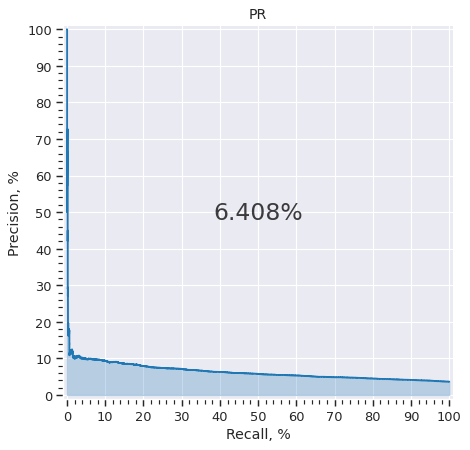

In [88]:
pre, rec, thresholds = metrics.precision_recall_curve(y_test, y_test_pred)

adjust_plot([1.25, 1.6], 1.4, 0.84)
fig, ax = plt.gcf(), plt.gca()
plot_curve(fig, ax, rec, pre, metrics.auc(rec, pre), ['Recall', 'Precision'])
ax.set_title('PR')
fig.tight_layout()
fig.show()

> Рассмотрев ROC и PR кривые можно заметить, что из-за сильного дисбаланса классов ROCAUC получился высокий, а PRAUC – крайне низкий. Это связано с тем, что Precision вычисляется как доля из **предсказанных** положительных примеров, в то время как FPR вычисляется как доля из **истинных** негативных примеров.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [89]:
def describe_binarization(threshold):
    binarized = y_test_pred >= threshold
    rejection_frac = binarized.mean()

    tp = ((y_test == 1) & (binarized == 1)).sum()
    fp = ((y_test == 0) & (binarized == 1)).sum()
    tn = ((y_test == 0) & (binarized == 0)).sum()
    fn = ((y_test == 1) & (binarized == 0)).sum()

    pre, rec = tp/(tp+fp), tp/(tp+fn)
    print(f"При пороге {threshold:.3%}")
    print(f"\tбудет совершен отказ для {tp+fp} ({rejection_frac:.5%}) клиентов")
    print(f"\tэто соответствует {pre:.5%} Precision, {rec:.5%} Recall")
    print(f"\tиз {tn+fn} принятых клиентов, {fn} обратятся к нам со страховым случаем")
    print(f"\tтаким образом мы заработаем {5*tn - 100*fn} тыс")

In [90]:
threshold_95pre = thresholds[(pre >= 0.95).argmax()]
describe_binarization(threshold_95pre)

При пороге 48.230%
	будет совершен отказ для 2 (0.00168%) клиентов
	это соответствует 100.00000% Precision, 0.04629% Recall
	из 119041 принятых клиентов, 4319 обратятся к нам со страховым случаем
	таким образом мы заработаем 141710 тыс


Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(1 балл)__

> Очевидно, что клиенты, которым мы отказали в страховке не приносят нам ни доходов ни расходов. Соответственно, баланс для клиентов от которых мы отказались "неотрицательный" ($0 \geq 0$) при любом пороге.
>
> Наверное вы имели ввиду, что баланс -- это разница между доходами и расходами на группе клиентов, которым мы **не** отказали в обслуживании. Этот баланс тоже всегда неотрицательный, т.к. подавляющее большинство клиентов никогда не воспользуются страховкой. (см. следующий пункт)

А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

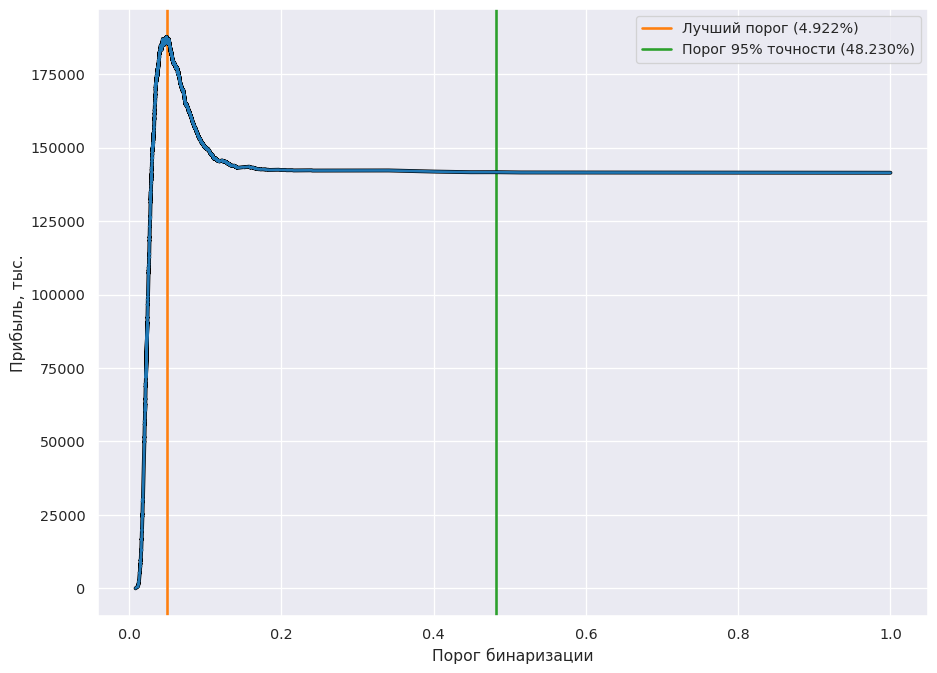

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
pos, neg = y_test.sum(), (1-y_test).sum()
thresholds = thresholds.clip(0, 1)

tns = (1-fpr) * neg
fns = (1-tpr) * pos
# Каждый True Negative клиент был нами принят и в итоге не обратился за страховкой (принес нам 5000)
# Каждый False Negative клиент был нами принят и в итоге обратился за страховкой (мы теряем 100000)
profits = 5 * tns - 100 * fns
best_threshold = thresholds[np.argmax(profits)]

adjust_plot([2.5, 2.5], 1.4, 0.93)
plt.axvline(best_threshold, color='C1', linewidth=2, label=f'Лучший порог ({best_threshold:.3%})')
plt.axvline(threshold_95pre, color='C2', linewidth=2, label=f'Порог 95% точности ({threshold_95pre:.3%})')
plt.plot(thresholds, profits, **black_outline)
plt.xlabel('Порог бинаризации')
plt.ylabel('Прибыль, тыс.')
plt.legend()
plt.show()

In [92]:
describe_binarization(best_threshold)

При пороге 4.922%
	будет совершен отказ для 21002 (17.64236%) клиентов
	это соответствует 6.86125% Precision, 33.34876% Recall
	из 98041 принятых клиентов, 2880 обратятся к нам со страховым случаем
	таким образом мы заработаем 187805 тыс


<img src="https://i.ibb.co/PwK6kK4/pain.png" border="0">

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__